<table align="left">
  <td>
    <a href="https://tinyurl.com/2zzbxxep" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Redes Neuronales Convolucionales(CNN) - Tensorflow

Las redes neuronales convolucionales son una variación de las redes neuronales artificiales que se han vuelto muy populares en el campo del aprendizaje profundo. Las redes neuronales convolucionales son muy eficientes para analizar imágenes y videos.

Visión computacional es una rama de la inteligencia artificial que se ocupa de hacer que las computadoras puedan entender imágenes y videos.

¿Qué es un problema de visión por computadora?: Problemos en los cuales se busca que una computadora pueda entender imágenes y videos.

- Clasificación de imágenes: Clasificar imágenes en diferentes categorías.
- Detección de objetos: Identificar objetos en una imagen.
- Segmentación de imágenes: Identificar qué parte de la imagen pertenece a qué objeto.
- Reconocimiento facial: Identificar quién está en una imagen.
- Reconocimiento de escenas: Identificar qué tipo de escena se está viendo en una imagen.
- Reconocimiento de texto: Identificar qué texto está escrito en una imagen.
- Reconocimiento de voz: Identificar qué se está diciendo en un video.



Temas a cubrir en este notebook:

* Obtener dataset para trabajar con ellos
* Arquitectura de una CNN
* Un ejemplo end-to-end de una CNN
* Pasos para el modelamiento de un problema de clasificación binaria con CNN
    * Conocer los datos
    * Preprocesamiento de los datos
    * Construcción del modelo de CNN
    * Entrenamiento del modelo
    * Evaluación del modelo
    * Mejorar el modelo
    * Realizar predicciones con el modelo entrenado
* Pasos para el modelamiento de un problema de clasificación multiclase con CNN
    * Conocer los datos
    * Preprocesamiento de los datos
    * Construcción del modelo de CNN
    * Entrenamiento del modelo
    * Evaluación del modelo
    * Mejorar el modelo
    * Realizar predicciones con el modelo entrenado

![cnn](https://i2.wp.com/datasmarts.net/es/wp-content/uploads/2018/11/1_N4h1SgwbWNmtrRhszM9EJg.png?fit=1558%2C424&ssl=1)

<a href="https://ibb.co/L0jfm19"><img src="https://i.ibb.co/QJSGLMY/cnn.png" alt="cnn" border="0"></a>

[:key: CNN Referencia: What is a Convolutional Neural Network?](https://poloclub.github.io/cnn-explainer/)

## Obtener dataset

Las imagenes que se utilizaran en el siguiente ejemplo hacen parte del dataset food101. Este dataset contiene 101,000 imágenes de 101 clases de comida diferentes. El dataset se encuentra dividido en 3 carpetas, una para entrenamiento, una para pruebas y otra para validación. Cada carpeta contiene 101 subcarpetas, una para cada clase de comida.

[:key: Dataset Referencia: Food101](https://www.tensorflow.org/datasets/catalog/food101)

Se utilizará el dataset pizza_steak, este dataset contiene imágenes de pizza y de carne asada. El dataset contiene 750 imágenes de pizza y 750 imágenes de carne asada. El dataset se encuentra dividido en 2 carpetas, una para entrenamiento y otra para pruebas. Cada carpeta contiene 2 subcarpetas, una para pizza y otra para carne asada.


In [2]:
import os

In [3]:
import zipfile
import wget # pip install wget - para windows

if(os.path.exists('pizza_steak')):
    print('Files exists')
else:
    # en caso de utilizar colab la descarga se puede realizar con el siguiente comando
    #!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

    # Download zip file of pizza_steak images using wget library in windows
    url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
    filename = wget.download(url)

    # Unzip the downloaded file
    zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
    zip_ref.extractall()
    zip_ref.close()

Files exists


## Inspeccionar el dataset

El objetivo de este paso es entender la estructura del dataset y ver si es posible utilizarlo para nuestro problema. Antes de empezar a trabajar con el dataset, es importante saber cuántas imágenes hay en el dataset, cuántas de cada clase, cuántas imágenes hay en el conjunto de entrenamiento y cuántas hay en el conjunto de pruebas.

In [4]:
!dir pizza_steak # para windows
#!ls pizza_steak # para colaboratory o linux

 El volumen de la unidad H es Google Drive
 El n�mero de serie del volumen es: 1983-1116

 Directorio de h:\Mi unidad\Github\TensorFlow-Course\pizza_steak

24/09/2020  08:56 p. m.    <DIR>          .
19/12/2022  03:38 p. m.    <DIR>          ..
19/08/2020  11:21 p. m.    <DIR>          test
19/08/2020  07:31 p. m.    <DIR>          train
               0 archivos              0 bytes

 Directorio de h:\Mi unidad\Github\TensorFlow-Course


 Directorio de h:\Mi unidad\Github\TensorFlow-Course


 Directorio de h:\Mi unidad\Github\TensorFlow-Course



No se encuentra el archivo


In [5]:
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.


### Nombre de las clases - 1
Para visualizar las imagenes, primero obtenemos los nombres de las clases de las imagenes.

In [6]:
# Obtener el nombre de las clases
# Este codigo crea una lista de clases utilizando el nombre de las carpetas
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [7]:
# Visualizar las imagenes
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Set the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (308, 512, 3)


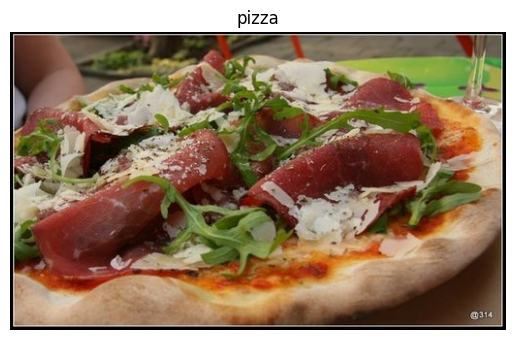

In [8]:
img = view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [9]:
# Convertir una imagen en un tensor
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(308, 512, 3), dtype=uint8, numpy=
array([[[ 1,  7,  7],
        [ 0,  1,  2],
        [ 7,  9,  8],
        ...,
        [ 0,  1,  0],
        [ 0,  1,  0],
        [ 1,  5,  4]],

       [[ 5, 11, 11],
        [ 2,  6,  7],
        [ 7,  7,  7],
        ...,
        [ 1,  3,  0],
        [ 5,  7,  6],
        [ 2,  6,  5]],

       [[ 0,  1,  0],
        [ 2,  4,  3],
        [ 1,  0,  0],
        ...,
        [ 7,  9,  6],
        [ 3,  5,  4],
        [ 0,  1,  0]],

       ...,

       [[15, 11, 10],
        [12,  8,  7],
        [ 3,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[ 1,  0,  0],
        [ 5,  3,  4],
        [ 7,  6,  4],
        ...,
        [ 2,  2,  2],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 5,  3,  4],
        [ 5,  3,  4],
        [ 1,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 6,  6,  6]]], dtype=uint8)>

In [10]:
# Ver la dimension de la imagen
img.shape # devuelve width, height, color channels

(308, 512, 3)

## Ejemplo end-to-end de una CNN

En este ejemplo se va a construir una CNN desde cero para clasificar imágenes de pizza y de carne asada. El objetivo es construir una CNN que pueda clasificar imágenes de pizza y de carne asada con una precisión mayor al 95%.

- Cargar las imágenes
- Preprocesar las imágenes
- Construir un modelo de CNN para encontrar patrones en las imágenes
- Compilar el modelo de CNN
- Ajustar el modelo de CNN
- Evaluar el modelo de CNN
- Predecir con el modelo de CNN


### Normalizar las imagenes

:key: Normalizar las imagenes es un paso importante para que el modelo pueda aprender mejor. Normalizar las imagenes significa convertir las imagenes de un rango de valores de 0 a 255 a un rango de valores de 0 a 1. Esto se hace dividiendo cada valor de pixel por 255.


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocesar las imagenes - normalizarlas entre 0 y 1
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Importar las imagenes desde el directorio y convertirlas en lotes
train_path = "pizza_steak/train/"
test_path = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(directory = train_path, 
                                                    batch_size = 32,
                                                    target_size = (224, 224),
                                                    class_mode = "binary",
                                                    seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_path,
                                                batch_size = 32,
                                                target_size = (224, 224),
                                                class_mode = "binary",
                                                seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
len(train_data) # 47 lotes de 32 imagenes cada uno
1500/32 # 47 lotes de 32 imagenes cada uno

46.875

In [13]:
len(valid_data) # 16 lotes de 32 imagenes cada uno
500/32 # 16 lotes de 32 imagenes cada uno

15.625

In [14]:
# Construir un modelo CNN (Tiny VGG the CNN explainer website https://poloclub.github.io/cnn-explainer/)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),

    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")])

# Compilar el modelo
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Entrenar el modelo
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # 47 lotes de 32 imagenes cada uno
                        validation_data=valid_data,
                        validation_steps=len(valid_data), # 16 lotes de 32 imagenes cada uno 
                        verbose=1)


Epoch 1/5
47/47 [==============================] - 24s 386ms/step - loss: 0.5741 - accuracy: 0.6760 - val_loss: 0.4136 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 18s 376ms/step - loss: 0.4273 - accuracy: 0.8073 - val_loss: 0.3526 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 17s 364ms/step - loss: 0.4018 - accuracy: 0.8153 - val_loss: 0.4270 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 17s 362ms/step - loss: 0.4220 - accuracy: 0.8087 - val_loss: 0.3350 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 17s 362ms/step - loss: 0.3637 - accuracy: 0.8527 - val_loss: 0.2997 - val_accuracy: 0.8700


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

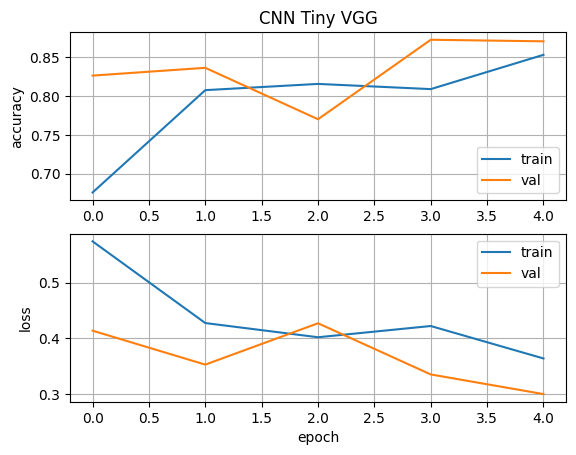

In [16]:
plt.subplot(211)
plt.title('CNN Tiny VGG')
plt.plot(history_1.history['accuracy'])  
plt.plot(history_1.history['val_accuracy'])
plt.ylabel('accuracy')  
plt.legend(['train', 'val'], loc='lower right')
plt.grid(True)

 # summarize history for loss  
plt.subplot(212)  
plt.plot(history_1.history['loss'])  
plt.plot(history_1.history['val_loss'])  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper right')  
plt.grid(True)

plt.show()

:key: Despues de 5 epochs, nuestro modelo obtuvo una exactitud de 87.8% en el conjunto de entrenamiento y una precisión de 86% en el conjunto de pruebas. Esto significa que nuestro modelo aprendió a clasificar correctamente las imágenes de pizza y de carne asada con una precisión de 86%.

Sin embargo, este modelo solo resuelve un problema de clasificación binaria. Los resultados muestran que el modelo aprendió algo. Sin embargo, no es suficiente para resolver el problema de clasificación multiclase que se tiene en el dataset food101.

## Red neuronal Densa para clasificación de imágenes

El siguiente modelo tiene como objetivo comparar el rendimiento de una red neuronal densa con el de una CNN para el problema de clasificación binario de pizza vs carne asada. El modelo de red neuronal densa tiene 3 capas ocultas, cada una con 100 neuronas.

In [17]:
# set the seed
tf.random.set_seed(42)

# Crear un modelo

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")])

# Compilar el modelo

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Entrenar el modelo

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # 47 lotes de 32 imagenes cada uno
                        validation_data=valid_data,
                        validation_steps=len(valid_data), # 16 lotes de 32 imagenes cada uno
                        verbose=1)


Epoch 1/5
47/47 [==============================] - 18s 383ms/step - loss: 4.1856 - accuracy: 0.6180 - val_loss: 1.3366 - val_accuracy: 0.5240
Epoch 2/5
47/47 [==============================] - 18s 375ms/step - loss: 0.6358 - accuracy: 0.7173 - val_loss: 0.8068 - val_accuracy: 0.6340
Epoch 3/5
47/47 [==============================] - 18s 377ms/step - loss: 0.6382 - accuracy: 0.7220 - val_loss: 0.4831 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 17s 372ms/step - loss: 0.4987 - accuracy: 0.7727 - val_loss: 0.4511 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 18s 378ms/step - loss: 0.6004 - accuracy: 0.7387 - val_loss: 0.4779 - val_accuracy: 0.7840


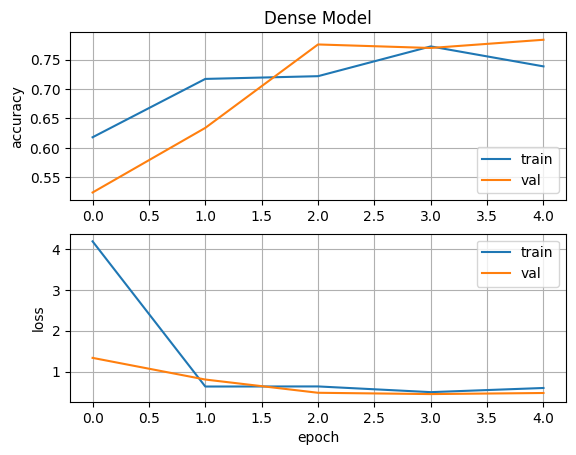

In [18]:
plt.subplot(211)
plt.title('Dense Model')
plt.plot(history_2.history['accuracy'])  
plt.plot(history_2.history['val_accuracy'])
plt.ylabel('accuracy')  
plt.legend(['train', 'val'], loc='lower right')
plt.grid(True)

 # summarize history for loss  
plt.subplot(212)  
plt.plot(history_2.history['loss'])  
plt.plot(history_2.history['val_loss'])  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper right')  
plt.grid(True)

plt.show()

In [19]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Clasificación binaria con CNN: Pasos

1. Conocer los datos
2. Preprocesamiento de los datos (normalización)
3. Construcción del modelo de CNN (Iniciar con un modelo base - estructura simple)
4. Entrenamiento del modelo
5. Evaluación del modelo
6. Mejorar el modelo (Tratar de vencer el modelo base)
7. Repetir hasta alcanzar el objetivo deseado (Experimentar, experimentar, experimentar)


### 1. Conocer los datos

En este paso se debe conocer el dataset, saber cuántas imágenes hay en el dataset, cuántas de cada clase, cuántas imágenes hay en el conjunto de entrenamiento y cuántas hay en el conjunto de pruebas.

Image shape: (512, 384, 3)
Image shape: (512, 384, 3)


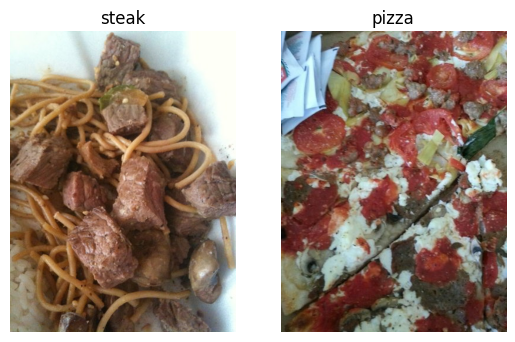

In [28]:
# Visualizar los datos
#plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocesamiento de los datos



In [29]:
# Definir el directorio del dataset

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


El siguiente paso es agrupar las imágenes en lotes - **batches**. El tamaño del lote es el número de imágenes que se procesan en cada paso de entrenamiento.

Un **Batch** es un subconjunto de imagenes. De tal forma que, durante el entrenamiento no se observan todas las imagenes al mismo tiempo, sino que se observan en grupos de imagenes.

Se realiza de esta forma por las siguientes razones:

1. 10,000 imágenes o mas pueden ser muy pesadas para la memoria RAM de la computadora.
2. Tratar de aprender los patrones de 10,000 imágenes a la vez puede ser muy difícil para el modelo.
3. Es común utilizar lotes de **32**, 64 o 128 imágenes.

> :key: **ImageDataGenerator**: Genera lotes de imágenes de forma automática incluyendo normalización y aumento de datos.

> :key: **flow_from_directory**: Crea un generador de lotes de imágenes a partir de las imágenes en un directorio. 



In [30]:
# Crear train y test data generators y rescalar las imagenes

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [32]:
# Cargar las imagenes del directorio y aplicar la normalización, 
# aumentación de datos y conversión en lotes. 

train_data = train_datagen.flow_from_directory(directory=train_dir, # Directorio del dataset
                                                target_size=(224, 224), # Tamaño de las imagenes
                                                batch_size=32, # Cantidad de imagenes por lote
                                                class_mode="binary", # Clases binarias
                                                seed=42) # Semilla para reproducibilidad

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode="binary",
                                                seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [39]:
# Obtener un ejemplo de un lote de imagenes y sus etiquetas
images, labels = train_data.next() # next() devuelve un lote de imagenes y sus etiquetas

len(images), len(labels)

(32, 32)

In [40]:
# Cuantos lotes de imagenes hay en el dataset de entrenamiento
len(train_data)

47

In [41]:
1500/32 # 47 lotes de 32 imagenes cada uno

46.875

In [46]:
# Observar las dos primeras imagenes del lote
images[:2], images[0].shape

(array([[[[0.14117648, 0.16862746, 0.19215688],
          [0.10588236, 0.13333334, 0.17254902],
          [0.1137255 , 0.1254902 , 0.18431373],
          ...,
          [0.0509804 , 0.03921569, 0.08235294],
          [0.0509804 , 0.03529412, 0.09019608],
          [0.04705883, 0.03137255, 0.08627451]],
 
         [[0.11764707, 0.12941177, 0.14901961],
          [0.09411766, 0.09411766, 0.14117648],
          [0.09411766, 0.09019608, 0.14509805],
          ...,
          [0.0509804 , 0.03921569, 0.08235294],
          [0.0509804 , 0.03529412, 0.09019608],
          [0.0509804 , 0.03529412, 0.09019608]],
 
         [[0.14117648, 0.14117648, 0.14901961],
          [0.1137255 , 0.10980393, 0.14117648],
          [0.08627451, 0.07843138, 0.12156864],
          ...,
          [0.04705883, 0.03529412, 0.07843138],
          [0.0509804 , 0.03529412, 0.09019608],
          [0.0509804 , 0.03529412, 0.09019608]],
 
         ...,
 
         [[0.53333336, 0.6627451 , 0.7843138 ],
          [0.54117

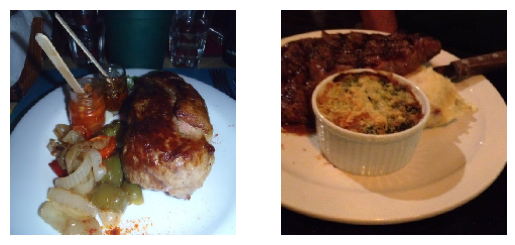

In [50]:
# Visualizar las dos primeras imagenes del lote
plt.subplot(1, 2, 1)
plt.imshow(images[0])
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(images[1])
plt.axis("Off");

### 3. Crear un modelo de CNN (Iniciar con un modelo base - estructura simple)

Un modelo base es un modelo relativamente simple o un modelo que ha sido probado y funciona bien en un problema similar al que se está tratando de resolver.

> :key: **Nota**: En deep learning, hay un gran número de arquitecturas que se pueden probar. Por lo tanto, una de las mejores formas para empezar, consiste en probar un modelo base, observar si funciona y a partir de ahí, ir mejorando el modelo agregando complejidad o haciendo cambios en la arquitectura. (Ej. Investigar cual modelo actual está presentando un mejor rendimiento para el problema en cuestión - [Papers with Code](https://paperswithcode.com/sota))



In [51]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [52]:
# crear un modelo base (baseline model)
model_3 = Sequential([
    Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224, 224, 3)), 
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2,padding="valid"),

    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation="sigmoid")
])